In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

### 1. Data 

In [2]:
# data source: https://github.com/amcquistan/WeatherPredictPythonML
df_weather = pd.read_csv("end-part2_df.csv", index_col="date")
df_weather.head()

,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,meanpressurem_1,...,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
date,,,,,,,,,,,,,,,,,,,,,
2015-01-04,-14,-12,-18,-4.0,-6.0,-6.0,-11.0,-9.0,-12.0,1016.0,...,-18.0,1025.0,1026.0,1025.0,1010.0,1017.0,1019.0,0.76,0.00,0.00
2015-01-05,-9,-3,-14,-14.0,-4.0,-6.0,-19.0,-11.0,-9.0,1033.0,...,-13.0,1043.0,1025.0,1026.0,1023.0,1010.0,1017.0,0.25,0.76,0.00
2015-01-06,-10,-6,-14,-9.0,-14.0,-4.0,-14.0,-19.0,-11.0,1032.0,...,-16.0,1043.0,1043.0,1025.0,1023.0,1023.0,1010.0,0.00,0.25,0.76
2015-01-07,-16,-12,-19,-10.0,-9.0,-14.0,-15.0,-14.0,-19.0,1036.0,...,-23.0,1043.0,1043.0,1043.0,1027.0,1023.0,1023.0,0.00,0.00,0.25
2015-01-08,-7,2,-16,-16.0,-10.0,-9.0,-22.0,-15.0,-14.0,1035.0,...,-17.0,1055.0,1043.0,1043.0,956.0,1027.0,1023.0,0.00,0.00,0.00


In [3]:
# select 2016 data only
df_2016 = df_weather.filter(like="2016", axis=0)
df_2016.head()

,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,meanpressurem_1,...,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,-2,3,-7,-8.0,-3.0,-4.0,-11.0,-7.0,-8.0,1030.0,...,-11.0,1032.0,1029.0,1025.0,1027.0,1023.0,1015.0,0.0,0.76,0.00
2016-01-02,-3,4,-10,-2.0,-8.0,-3.0,-8.0,-11.0,-7.0,1029.0,...,-10.0,1032.0,1032.0,1029.0,1027.0,1027.0,1023.0,0.0,0.00,0.76
2016-01-03,-4,1,-9,-3.0,-2.0,-8.0,-8.0,-8.0,-11.0,1025.0,...,-16.0,1027.0,1032.0,1032.0,1023.0,1027.0,1027.0,0.0,0.00,0.00
2016-01-04,-5,-2,-8,-4.0,-3.0,-2.0,-8.0,-8.0,-8.0,1030.0,...,-11.0,1034.0,1027.0,1032.0,1025.0,1023.0,1027.0,0.0,0.00,0.00
2016-01-05,-1,5,-6,-5.0,-4.0,-3.0,-8.0,-8.0,-8.0,1032.0,...,-12.0,1035.0,1034.0,1027.0,1028.0,1025.0,1023.0,0.0,0.00,0.00


In [4]:
# extract months from date
df_2016.reset_index(inplace=True)
df_2016["month"] = df_2016["date"].apply(lambda s: int(s.split("-")[1]))
df_2016.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,...,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3,month
0,2016-01-01,-2,3,-7,-8.0,-3.0,-4.0,-11.0,-7.0,-8.0,...,1032.0,1029.0,1025.0,1027.0,1023.0,1015.0,0.0,0.76,0.00,1
1,2016-01-02,-3,4,-10,-2.0,-8.0,-3.0,-8.0,-11.0,-7.0,...,1032.0,1032.0,1029.0,1027.0,1027.0,1023.0,0.0,0.00,0.76,1
2,2016-01-03,-4,1,-9,-3.0,-2.0,-8.0,-8.0,-8.0,-11.0,...,1027.0,1032.0,1032.0,1023.0,1027.0,1027.0,0.0,0.00,0.00,1
3,2016-01-04,-5,-2,-8,-4.0,-3.0,-2.0,-8.0,-8.0,-8.0,...,1034.0,1027.0,1032.0,1025.0,1023.0,1027.0,0.0,0.00,0.00,1
4,2016-01-05,-1,5,-6,-5.0,-4.0,-3.0,-8.0,-8.0,-8.0,...,1035.0,1034.0,1027.0,1028.0,1025.0,1023.0,0.0,0.00,0.00,1


### 2. Plot `meantempm`

In [5]:
df_jan = df_2016.query("month==1")
df_jan.head()

,date,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,...,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3,month
0,2016-01-01,-2,3,-7,-8.0,-3.0,-4.0,-11.0,-7.0,-8.0,...,1032.0,1029.0,1025.0,1027.0,1023.0,1015.0,0.0,0.76,0.00,1
1,2016-01-02,-3,4,-10,-2.0,-8.0,-3.0,-8.0,-11.0,-7.0,...,1032.0,1032.0,1029.0,1027.0,1027.0,1023.0,0.0,0.00,0.76,1
2,2016-01-03,-4,1,-9,-3.0,-2.0,-8.0,-8.0,-8.0,-11.0,...,1027.0,1032.0,1032.0,1023.0,1027.0,1027.0,0.0,0.00,0.00,1
3,2016-01-04,-5,-2,-8,-4.0,-3.0,-2.0,-8.0,-8.0,-8.0,...,1034.0,1027.0,1032.0,1025.0,1023.0,1027.0,0.0,0.00,0.00,1
4,2016-01-05,-1,5,-6,-5.0,-4.0,-3.0,-8.0,-8.0,-8.0,...,1035.0,1034.0,1027.0,1028.0,1025.0,1023.0,0.0,0.00,0.00,1


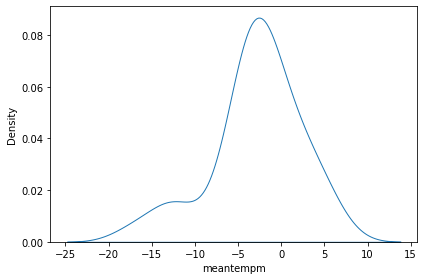

In [6]:
fig, ax = plt.subplots()

sns.kdeplot(df_jan["meantempm"], fill=True, alpha=0, ax=ax)

fig.tight_layout()
fig.savefig("61_mpl_colormapkde_01.png")

In [7]:
x = np.linspace(0, 1, 100)

im = ax.imshow(np.vstack([x, x]), 
               cmap="inferno",
               aspect="auto",
               extent=[*ax.get_xlim(), *ax.get_ylim()]
              )

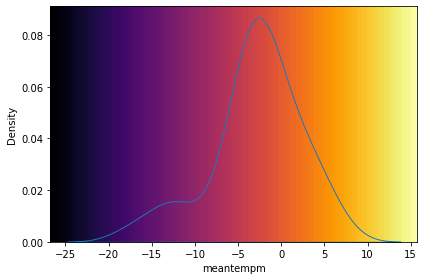

In [8]:
display(fig)
fig.tight_layout()
fig.savefig("61_mpl_colormapkde_03.png")

In [9]:
ax.collections

In [10]:
print(ax.collections[0].get_paths()[0])

Path(array([[-2.48238595e+01,  5.51614084e-05],
       [-2.48238595e+01,  0.00000000e+00],
       [-2.46296499e+01,  0.00000000e+00],
       [-2.44354402e+01,  0.00000000e+00],
       [-2.42412306e+01,  0.00000000e+00],
       [-2.40470209e+01,  0.00000000e+00],
       [-2.38528113e+01,  0.00000000e+00],
       [-2.36586017e+01,  0.00000000e+00],
       [-2.34643920e+01,  0.00000000e+00],
       [-2.32701824e+01,  0.00000000e+00],
       [-2.30759727e+01,  0.00000000e+00],
       [-2.28817631e+01,  0.00000000e+00],
       [-2.26875534e+01,  0.00000000e+00],
       [-2.24933438e+01,  0.00000000e+00],
       [-2.22991342e+01,  0.00000000e+00],
       [-2.21049245e+01,  0.00000000e+00],
       [-2.19107149e+01,  0.00000000e+00],
       [-2.17165052e+01,  0.00000000e+00],
       [-2.15222956e+01,  0.00000000e+00],
       [-2.13280859e+01,  0.00000000e+00],
       [-2.11338763e+01,  0.00000000e+00],
       [-2.09396666e+01,  0.00000000e+00],
       [-2.07454570e+01,  0.00000000e+00],
      

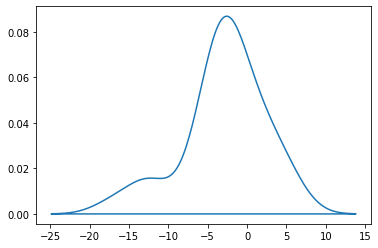

In [11]:
vertices = ax.collections[0].get_paths()[0].vertices.T

plt.plot(*vertices)
plt.savefig("61_mpl_colormapkde_04.png")

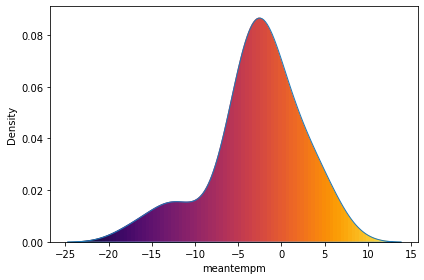

In [12]:
path = ax.collections[0].get_paths()[0]
patch = mpl.patches.PathPatch(path, transform=ax.transData)
im.set_clip_path(patch)

display(fig)
fig.tight_layout()
fig.savefig("61_mpl_colormapkde_05.png")

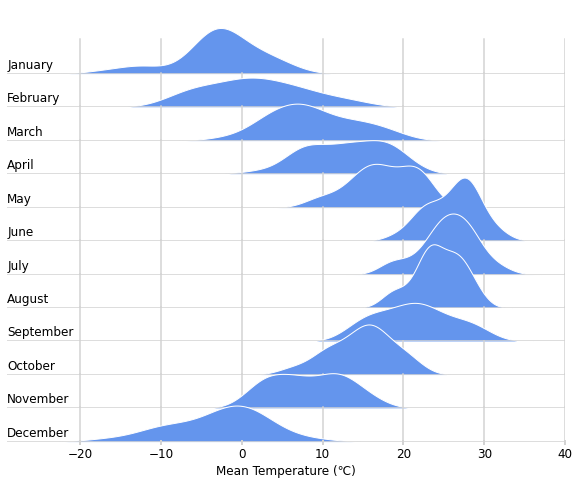

In [13]:
import calendar 

fig, axes = plt.subplots(nrows=12, figsize=(10,8), sharex=True, sharey=True)

for i, ax in enumerate(axes, 1):
    sns.kdeplot(df_2016.query(f"month=={i}")["meantempm"], 
                shade=True, color="w", facecolor="cornflowerblue", alpha=1,
                legend=False, ax=ax)
    
    ax.set_xlim(-29, 40)    
    ax.text(-29, 0.01, calendar.month_name[i], fontdict={"fontsize":"large"}) 
    
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    if i != 12:
        ax.tick_params(axis="x", length=0)
    else:
        ax.tick_params(axis="x", direction="inout", color="lightgray", 
                       length=5, width=2, labelsize="large")
        ax.set_xlabel("Mean Temperature (℃)", fontdict={"fontsize":"large"})
    
    ax.set_yticks([]) 
    ax.set_ylabel("") 
    
    xticks = ax.get_xticks()
    for xtick in xticks:
        ax.plot([xtick, xtick], [0, 0.065], color='lightgray', zorder=0)
        
    ax.axhline(0, color="lightgray")
    ax.patch.set_alpha(0)
    
fig.subplots_adjust(hspace=-0.5) 
fig.savefig("61_mpl_colormapkde_06.png")

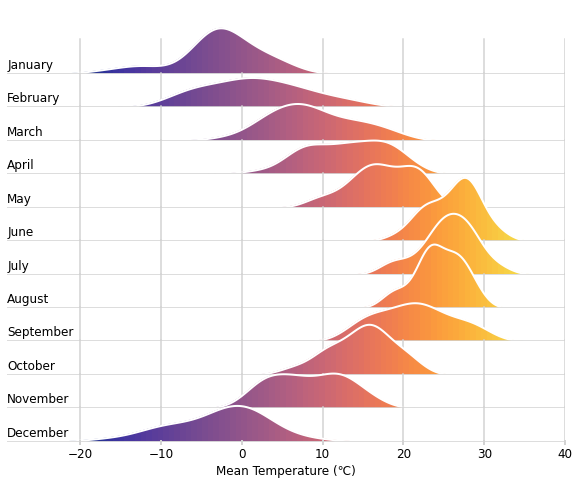

In [14]:
import calendar 
import cmocean as cmo

fig, axs = plt.subplots(nrows=12, figsize=(10,8), sharex=True, sharey=True)
fig.set_facecolor("none")

x = np.linspace(0, 1, 100)
for i, ax in enumerate(axs, 1):
    sns.kdeplot(df_2016.query(f"month=={i}")["meantempm"], 
                fill=True, color="w", alpha=0, linewidth=2, legend=False, ax=ax)
    
    ax.set_xlim(-29, 40)  
    
    # >>> Add gradient
    im = ax.imshow(np.vstack([x, x]), 
               cmap="cmo.thermal",
               aspect="auto",
               extent=[*ax.get_xlim(), *ax.get_ylim()]
              )
    path = ax.collections[0].get_paths()[0]
    patch = mpl.patches.PathPatch(path, transform=ax.transData)
    im.set_clip_path(patch)
    # <<< Add gradient
  
    ax.text(-29, 0.01, calendar.month_name[i], fontdict={"fontsize":"large"}) 
    
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    if i != 12:
        ax.tick_params(axis="x", length=0)
    else:
        ax.tick_params(axis="x", direction="inout", color="lightgray", 
                       length=5, width=2, labelsize="large")
        ax.set_xlabel("Mean Temperature (℃)", fontdict={"fontsize":"large"})
    
    ax.set_yticks([]) 
    ax.set_ylabel("") 
    
    xticks = ax.get_xticks()
    for xtick in xticks:
        ax.plot([xtick, xtick], [0, 0.065], color='lightgray', zorder=0)
        
    ax.axhline(0, color="lightgray")
    ax.set_facecolor("none")
    
fig.subplots_adjust(hspace=-0.5) 
fig.savefig("61_mpl_colormapkde_07.png")

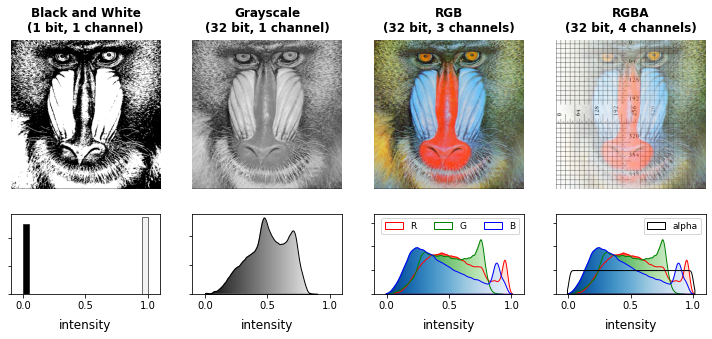

In [17]:
import seaborn as sns
from matplotlib import colors

mandrill_rgb = plt.imread("USC_SIPI_Mandrill.tiff")/256
ruler = plt.imread("USC_SIPI_Ruler.512.tiff")/256

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

mandrill_grayscale = rgb2gray(mandrill_rgb)
mandrill_bw = np.where(mandrill_grayscale >= 0.5, 1, 0)

# adding alpha channel
mandrill_a = np.zeros(mandrill_grayscale.shape)
for i in range(mandrill_a.shape[0]):
    mandrill_a[:,i] = i/mandrill_a.shape[0]
mandrill_alpha = np.insert(mandrill_rgb, 3, mandrill_a, axis=2)


fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(10, 5), gridspec_kw={"height_ratios":[3,1]})

for ax, img, title in zip(axes[0], 
                          [mandrill_bw, mandrill_grayscale, mandrill_rgb, mandrill_alpha], 
                          ["Black and White\n(1 bit, 1 channel)", "Grayscale\n(32 bit, 1 channel)", "RGB\n(32 bit, 3 channels)", "RGBA\n(32 bit, 4 channels)"]):
    if "RGB" in title:
        ax.imshow(img)
    else:
        ax.imshow(img, cmap="gist_gray")
    ax.set_title(title, fontweight="bold", pad=8)
    ax.axis(False)


    
### histogram

# black and white
sns.histplot(mandrill_bw.ravel(), bins=20, ax=axes[1, 0])
for p in axes[1, 0].patches:
    p.set_facecolor(str(p.get_x()))
    
# grayscale
sns.kdeplot(mandrill_grayscale.ravel(), bw_adjust=0.5, cut=0, 
            fill=True, color="k", alpha=0, ax=axes[1, 1])
x = np.linspace(0, 1, 100)
im = axes[1, 1].imshow(np.vstack([x, x]), cmap="gist_gray",
               aspect="auto", extent=[*axes[1,1].get_xlim(), *axes[1,1].get_ylim()])
path = axes[1, 1].collections[0].get_paths()[0]
patch = mpl.patches.PathPatch(path, transform=axes[1, 1].transData)
im.set_clip_path(patch)

# RGB
sns.kdeplot(mandrill_rgb[:, :, 0].ravel(), bw_adjust=0.5, cut=1, fill=True, alpha=0, color="red", label="R", ax=axes[1, 2])
sns.kdeplot(mandrill_rgb[:, :, 1].ravel(), bw_adjust=0.5, cut=1, fill=True, alpha=0, color="green", label="G", ax=axes[1, 2])
sns.kdeplot(mandrill_rgb[:, :, 2].ravel(), bw_adjust=0.5, cut=1, fill=True, alpha=0, color="blue", label="B", ax=axes[1, 2])
for i, color in enumerate(["red", "green", "blue"]):
    im = axes[1, 2].imshow(np.vstack([x, x]), cmap=f"{color.capitalize()}s_r",
                           aspect="auto", extent=[*axes[1, 2].get_xlim(), *axes[1, 2].get_ylim()])
    path = axes[1, 2].collections[i].get_paths()[0]
    patch = mpl.patches.PathPatch(path, transform=axes[1, 2].transData)
    im.set_clip_path(patch)
axes[1, 2].set_ylim(top=axes[1, 2].get_ylim()[1] * 1.4)
axes[1, 2].legend(ncol=3, fontsize=9)    

# alpha
axes[0, -1].imshow(ruler, zorder=-1, cmap="gist_gray")
sns.kdeplot(mandrill_alpha[:, :, 0].ravel(), bw_adjust=0.5, cut=1, fill=True, alpha=0, color="red", label="R", ax=axes[1, 3])
sns.kdeplot(mandrill_alpha[:, :, 1].ravel(), bw_adjust=0.5, cut=1, fill=True, alpha=0, color="green", label="G", ax=axes[1, 3])
sns.kdeplot(mandrill_alpha[:, :, 2].ravel(), bw_adjust=0.5, cut=1, fill=True, alpha=0, color="blue", label="B", ax=axes[1, 3])
sns.kdeplot(mandrill_alpha[:, :, 3].ravel(), bw_adjust=0.5, cut=1, fill=True, alpha=0, color="k", label="alpha", ax=axes[1, 3])
for i, color in enumerate(["red", "green", "blue"]):
    im = axes[1, 3].imshow(np.vstack([x, x]), cmap=f"{color.capitalize()}s_r",
                           aspect="auto", extent=[*axes[1, 3].get_xlim(), *axes[1, 3].get_ylim()])
    path = axes[1, 3].collections[i].get_paths()[0]
    patch = mpl.patches.PathPatch(path, transform=axes[1, 3].transData)
    im.set_clip_path(patch)
axes[1, 3].set_ylim(top=axes[1, 3].get_ylim()[1] * 1.4)
handles, labels = axes[1, 3].get_legend_handles_labels()
axes[1, 3].legend(handles=handles[-1:], labels=labels[-1:], fontsize=9)    
    
for ax in axes[1]:
    ax.set_xlim(-0.1, 1.1)
    ax.set_yticklabels([])
    ax.set_xlabel('intensity', fontsize=12, labelpad=8)
    ax.set_ylabel('')

    
fig.tight_layout()
fig.savefig("61_mpl_colormapkde_08.png")